In [19]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('/content/fake_news_cleaned.csv')

In [20]:
#Few rows of the dataset to understand the data
df.head()

,text,label,processed_text,cleaned_text
0,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...,no comment is expected from barack obama membe...
1,Did they post their votes for Hillary already?,1,did they post their votes for hillary already?,did they post their votes for hillary already
2,"Now, most of the demonstrators gathered last ...",1,"now, most of the demonstrators gathered last ...",now most of the demonstrators gathered last ni...
3,A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...,a dozen politically active pastors came here f...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"the rs-28 sarmat missile, dubbed satan 2, will...",the sarmat missile dubbed satan will replace t...


In [21]:
#importing the feature engineering libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
#formatting the text column to string
df['cleaned_text'] = df['cleaned_text'].astype(str)

In [23]:
#tokenizing the text column
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

In [24]:
#sequencing and padding the text column
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
padded_text = pad_sequences(sequences,maxlen = 200, padding='post', truncating='post')

print(padded_text.shape)

(62718, 200)


In [25]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

labels = df['label'].values

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(padded_text, labels, test_size=0.2, random_state=42)


In [26]:
#printing the shape of the data
print('the shape of X_train:',X_train.shape)
print('the shape of y_train:',y_train.shape)


the shape of X_train: (50174, 200)
the shape of y_train: (50174,)


In [27]:
#Building the model an Bidirectional LSTM model with Dropout Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=10000,output_dim = 256, input_length=200))  # Embedding layer
model.add(SpatialDropout1D(0.3))
model.add(LSTM(128, return_sequences=True))  # Bidirectional LSTM layer
model.add(Dropout(0.3))  # Dropout for regularization
model.add(LSTM(64))  # Another Bidirectional LSTM layer
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#To view the simmary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Training the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)


Epoch 1/10
392/392 - 15s - 39ms/step - accuracy: 0.6997 - loss: 0.5879 - val_accuracy: 0.8391 - val_loss: 0.4010
Epoch 2/10
392/392 - 20s - 52ms/step - accuracy: 0.7997 - loss: 0.4365 - val_accuracy: 0.8808 - val_loss: 0.3114
Epoch 3/10
392/392 - 20s - 51ms/step - accuracy: 0.8491 - loss: 0.3616 - val_accuracy: 0.8295 - val_loss: 0.3981
Epoch 4/10
392/392 - 21s - 54ms/step - accuracy: 0.8592 - loss: 0.3462 - val_accuracy: 0.8929 - val_loss: 0.2733
Epoch 5/10
392/392 - 20s - 51ms/step - accuracy: 0.8731 - loss: 0.3373 - val_accuracy: 0.8658 - val_loss: 0.3174
Epoch 6/10
392/392 - 20s - 52ms/step - accuracy: 0.9093 - loss: 0.2490 - val_accuracy: 0.8076 - val_loss: 0.3985
Epoch 7/10
392/392 - 21s - 53ms/step - accuracy: 0.9342 - loss: 0.1764 - val_accuracy: 0.9443 - val_loss: 0.1532
Epoch 8/10
392/392 - 20s - 52ms/step - accuracy: 0.9593 - loss: 0.1153 - val_accuracy: 0.9527 - val_loss: 0.1322
Epoch 9/10
392/392 - 13s - 33ms/step - accuracy: 0.9554 - loss: 0.1308 - val_accuracy: 0.9518 - 

In [29]:
#Evaluating the Model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions



392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9544802295918368


In [31]:
#classification score
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6922
           1       0.95      0.95      0.95      5622

    accuracy                           0.95     12544
   macro avg       0.95      0.95      0.95     12544
weighted avg       0.95      0.95      0.95     12544



<Axes: >

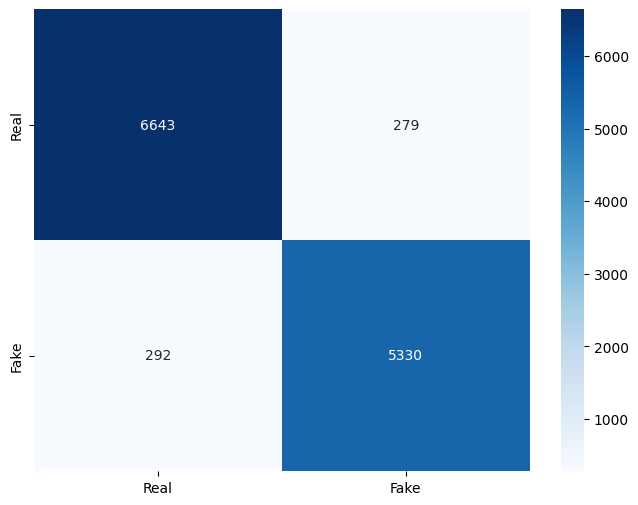

In [32]:
#applying the confusion matrix to visualize the evaluation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])

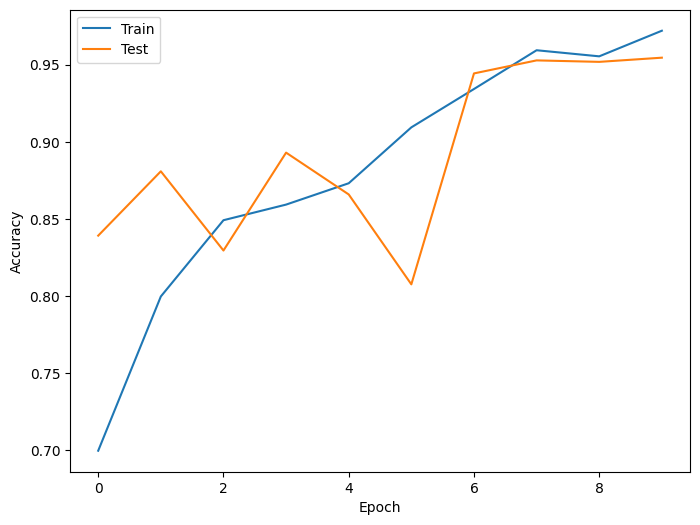

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

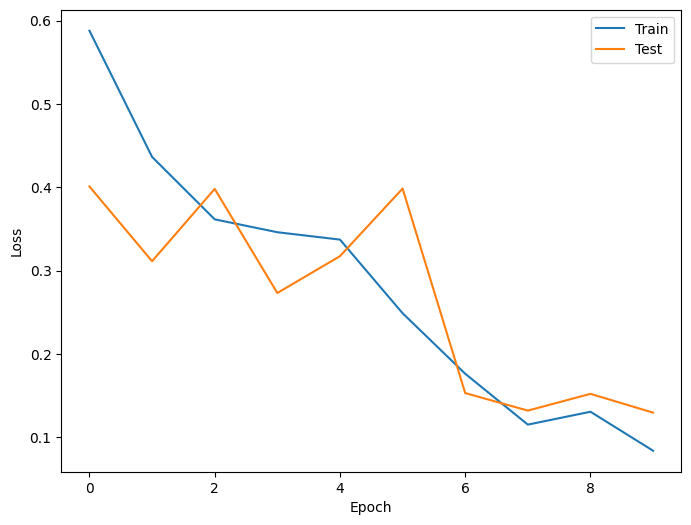

In [34]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

In [35]:
#Saving the model
model.save('fake_news_classifier_bidir_lstm.h5')